# Multi-Armed Bandits

<img src="https://upload.wikimedia.org/wikipedia/commons/8/82/Las_Vegas_slot_machines.jpg" />

Source: https://upload.wikimedia.org/wikipedia/commons/8/82/Las_Vegas_slot_machines.jpg

We have

In [1]:
import gym

In [2]:
import gym_bandits

In [3]:
env =  gym.make("BanditTenArmedGaussian-v0") 

WARN: Environment '<class 'gym_bandits.bandit.BanditTenArmedGaussian'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


In [4]:
env.action_space

Discrete(10)

In [5]:
env.observation_space

Discrete(1)

In the other words, we have only one state $s\in S$. 

**Question**: Can we change the state by taking actions?

Some notes on multi-armed bandit problem (source: <a href="https://en.wikipedia.org/wiki/Multi-armed_bandit#Empirical_motivation">wikipedia</a>):

- Applications e.g. in clinical trials. Each patient is an experiment, the arms are alternative treatments
- Well known to be intrackable (no closed form solution): Originally considered by Allied scientists in World War II, it proved so intractable that, according to Peter Whittle, the problem was proposed to be dropped over Germany so that German scientists could also waste their time on it.
- The version of the problem now commonly analyzed was formulated by Herbert Robbins in 1952.

**Question**: Is it realy so difficult? Consider 2 actions, return as conditional Bernouli distribution, and 2 steps. If you are done, try 3 steps.

In [6]:
print('\t'.join(['Time','Observation','Action','Reward']))
for i_episode in range(10):
    print("===== EPISODE {}=====".format(i_episode))
    observation = env.reset()
    for t in range(100):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print('\t'.join(list(map(str,[t,observation,action,reward]))))
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

Time	Observation	Action	Reward
===== EPISODE 0=====
0	0	5	-0.6232508517399515
Episode finished after 1 timesteps
===== EPISODE 1=====
0	0	0	-0.33456919990019385
Episode finished after 1 timesteps
===== EPISODE 2=====
0	0	3	-1.384817721806249
Episode finished after 1 timesteps
===== EPISODE 3=====
0	0	3	-0.7165657521769264
Episode finished after 1 timesteps
===== EPISODE 4=====
0	0	7	0.9453545729119195
Episode finished after 1 timesteps
===== EPISODE 5=====
0	0	9	2.126952272240965
Episode finished after 1 timesteps
===== EPISODE 6=====
0	0	3	-0.12968721531086413
Episode finished after 1 timesteps
===== EPISODE 7=====
0	0	5	1.3323833826250182
Episode finished after 1 timesteps
===== EPISODE 8=====
0	0	2	-0.5542941386226383
Episode finished after 1 timesteps
===== EPISODE 9=====
0	0	4	-0.29894102333899275
Episode finished after 1 timesteps


In [7]:
print('\t'.join(['Time','Observation','Action','Reward']))
for i_episode in range(30):
    observation = env.reset()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print('\t'.join(list(map(str,[i_episode,observation,action,reward]))))

Time	Observation	Action	Reward
0	0	7	-0.11458134130714526
1	0	6	-0.05251926212761554
2	0	8	-1.8060781252992535
3	0	8	-0.3205953219507325
4	0	1	1.3801410235461602
5	0	6	-0.06412929075234658
6	0	7	2.7092887283221767
7	0	7	1.5191153655997138
8	0	8	0.8391466389694875
9	0	1	1.9511969548578136
10	0	5	-0.9713368582429469
11	0	9	2.6788279728327864
12	0	8	0.5677232692095521
13	0	9	2.18740203686155
14	0	4	-1.8097289910922982
15	0	3	-2.956058795339057
16	0	0	-2.921883806239869
17	0	3	-2.275909461674109
18	0	5	-0.014676692606119701
19	0	0	-1.9871856903723994
20	0	2	-0.6145601038209737
21	0	3	-0.39358871776566906
22	0	8	-1.2420360278680351
23	0	1	-0.23705956626294444
24	0	3	-0.16193968982538032
25	0	3	-2.3903990143452303
26	0	3	-1.0590177638122085
27	0	7	0.7087293933872154
28	0	0	-1.3117536954696276
29	0	1	1.0193951400800725


In [8]:
import pandas as pd
columns = ['Time','Observation','Action','Reward']
results = []
observation = env.reset()
for i_episode in range(1000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    results.append([i_episode,observation,action,reward])

df = pd.DataFrame(results,columns=columns)
df.head()

,Time,Observation,Action,Reward
0,0,0,9,3.148565
1,1,0,9,2.935124
2,2,0,0,0.367045
3,3,0,4,1.215015
4,4,0,7,0.612823


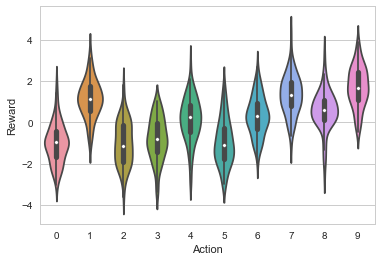

In [9]:
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
sns.violinplot(y='Reward',x='Action',data=df)

After 1000 trials, we have a good understanding which arm is good and which is bad.

Since we are interested in s
$q(a) = \mathbb{E}(R|A=a)$, we can approximate from the data set as follows:

In [10]:
Q = df.groupby('Action').mean()['Reward']
Q

Action
0   -0.999224
1    1.138020
2   -0.997804
3   -0.795959
4    0.146801
5   -0.938113
6    0.321937
7    1.332063
8    0.582486
9    1.719269
Name: Reward, dtype: float64

With our completely random selection, the total reward is after 1000 of iterations:

In [11]:
sum(df['Reward'])

113.69843065427803

**Question:** What are the possibilities to do it smarter than randomly?

In [158]:
import numpy as np
class RandomAgent:
    def __init__(self,n_bandits):
        self.n_bandits=n_bandits
    def next_action(self,observation):
        return np.random.randint(0,self.n_bandits)
    def update(self,observation,action,reward):
        pass
    def reset(self):
        pass

In [159]:
random_agent = RandomAgent(10)
policy.next_action(1)

5

In [160]:
def run_experiment(agent,n_runs=2000): 
    runs = []
    for n in range(n_runs):
        run = []
        observation = env.reset()
        agent.reset()
        for i_episode in range(1000):
            action = agent.next_action(observation)
            observation, reward, done, info = env.step(action)
            agent.update(observation,action,reward)
            run.append(reward)
        runs.append(run)
    a = np.array(runs)
    print(a.shape)
    return a.mean(axis=0)

In [161]:
random_agent_results = run_experiment(random_agent)

(2000, 1000)


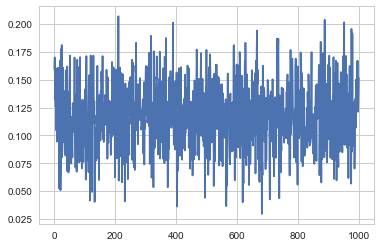

In [162]:
import matplotlib.pyplot as plt
plt.plot(random_agent_results)

## Online Learning

$\bar{X}_n=\frac{1}{n}\sum_{i=1}^{n}X_{i}$

$=\frac{1}{n}\left( X_n + \sum_{i=1}^{n-1}X_{i} \right)$

$=\frac{1}{n}\left( X_n + (n-1)\frac{1}{n-1}\sum_{i=1}^{n-1}X_{i} \right)$

$=\frac{1}{n}\left( X_n + (n-1)\bar{X}_{n-1} \right)$

$=\frac{1}{n}\left( X_n + n\bar{X}_{n-1}-\bar{X}_{n-1} \right)$

$=\bar{X}_{n-1}+\frac{1}{n}\left( X_n -\bar{X}_{n-1} \right)$

Using this formula, we will update the estimates of $Q$ for all bandits.

In [167]:
import numpy as np
class LearningAgent():
    def __init__(self,n_bandits):
        self.n_bandits = n_bandits
        self.reset()
    def reset(self):
        self.all_n = np.zeros(self.n_bandits)
        self.all_Q = np.zeros(self.n_bandits)
    def update(self,s,a,r):
        self.all_n[a]+=1
        self.all_Q[a]+=(r-self.all_Q[a])/self.all_n[a]

In [168]:
agent = LearningAgent(10)
agent.update(1,5,3)
agent.all_Q

array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0.])

## Greedy Strategy

In [169]:
class GreedyLearningAgent(LearningAgent):
    def next_action(self,observation):
        return self.all_Q.argmax()

(2000, 1000)


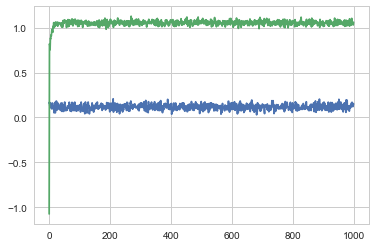

In [170]:
greedy_agent = GreedyLearningAgent(10)
greedy_agent_results = run_experiment(greedy_agent)
plt.plot(random_agent_results)
plt.plot(greedy_agent_results)

In [171]:
greedy_agent.all_Q

array([-2.32041113,  1.11653817,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

**Questions**:

* What is the disadvantage of the greedy approach?
* What ideas can be adopted to cope with that?

## Epsilon Greedy Strategy

In [177]:
class EpsilonGreedyLearningAgent(LearningAgent):
    def __init__(self,n_bandits,epsilon):
        super(EpsilonGreedyLearningAgent,self).__init__(n_bandits)
        self.epsilon = epsilon
    def next_action(self,observation):
        p = np.random.random()
        if p<self.epsilon:
            return np.random.randint(0,self.n_bandits)
        else:
            return self.all_Q.argmax()

Question:

* If we have two actions (arms) and the learned Q is correct. What is the probability of selecting the right action if $\epsilon=0.5$?

(2000, 1000)
(2000, 1000)
(2000, 1000)
(2000, 1000)
(2000, 1000)
(2000, 1000)


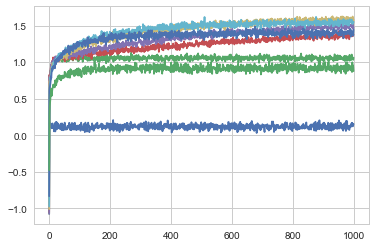

In [173]:
plt.plot(random_agent_results)
plt.plot(greedy_agent_results)
epsilon_results_all = []
for epsilon in [0.01,0.02,0.05,0.1,0.2,0.5]:
    epsilon_greedy_agent = EpsilonGreedyLearningAgent(10,epsilon)
    results = run_experiment(epsilon_greedy_agent)
    plt.plot(results)
    epsilon_results_all.append(results)


In [174]:
epsilon_greedy_agent.all_Q

array([-1.27890007,  0.75560333, -0.9708844 , -0.74056873,  0.20929081,
       -0.9574323 ,  0.18976751,  1.57069555,  0.6405596 ,  1.7958147 ])

## Timed Exploration

In [175]:
class TimedExplorationLearningAgent(LearningAgent):
    def __init__(self,n_bandits,t_max):
        super(TimedExplorationLearningAgent,self).__init__(n_bandits)
        self.t_max = t_max
        self.t = 0
    def next_action(self,s):
        p = np.random.random()
        if self.t<self.t_max:
            return np.random.randint(0,self.n_bandits)
        else:
            return self.all_Q.argmax()
    def update(self,s,a,r):
        super(TimedExplorationLearningAgent,self).update(s,a,r)
        self.t+=1

(2000, 1000)


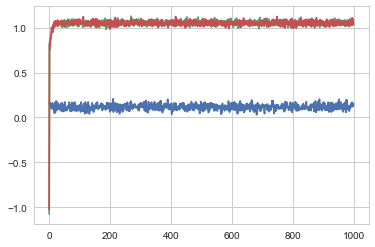

In [176]:
timed_agent = TimedExplorationLearningAgent(10,500)
timed_results = run_experiment(timed_agent)
plt.plot(random_agent_results)
plt.plot(greedy_agent_results)
plt.plot(timed_results)

## Upper Confidence Bound (UCB)
Chernoff-Hoeffding bound:
$$P(|\bar{X}-\mu|\geq\epsilon)\leq 2 \exp(-2\epsilon^2N)$$
Can be translated into an update algorithm:
$$X_{ucb,j}=\bar{X}_j + \sqrt{2\frac{\ln{N}}{N_j}}$$

## Non Stationary Bandits

If statatistics of the process vary over time (mean, variance).

Trick:
$Q_n=Q_{n-1}+\alpha(r_n+Q_{n-1})$

$\alpha$ instead of $1/N$

**Questions**

* Why it is good?
* Why it is bad?

## Contextual Bandits

The state can change, but we cannot change the state by our actions.

**Questions**:

* What can be a real-world example for this?
* How to cope with that if the number of states is finite?
* How to cope with that if the number of states is $\mathbb{R}^n$?

# Homework
* Obligatory: implement UCB agent and test it

* Voluntary: find and simulate a realistic non-stationary process that can be subject to bandits.

# Next Lecture: Dynamic Programming
* How to make optimal decisions in *known* dynamic environments.